In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define some parameters

# maximal Gibbs dissipation rate in kJ/C-mol/h (from Niebel 3.7 kJ/gCDW/h)
# With biomass CH1.613O0.557N0.158P0.012S0.003 (Battley2013) roughly 3/7 gC/gCDW
# Thus 1 gCDW ~ 0.42 gC ~ 0.035 C-mol
#Dmax = 100 
Dmax = 3.7*30

# (negative) Gibbs energies per C-mol for catabolic processes, Heijnen1992, vonStockar1999, Battley2013
#G1 = 40 # fermentation
#G2 = 500 # respiration (exact values somewhat different, but doesn't matter for now)
G1 = 39 # fermentation
G2 = 479 # respiration (values from vonStockar1999)

# (negative) Gibbs energies of reaction for macrochemical reaction, Heijnen1992, vonStockar1999
GM1 = 250 # fermentation
GM2 = 330 # respiration

In [4]:
# function to determine relative fermentation rate for given growth rate
def catabolicRates(lam):
    '''
    Parameters
    ----------
    lam : float or np.array
        growth rate

    Returns
    -------
    a : float
        relative rate of fermentation
    c : float
        total catabolic rate
    '''
    
    if type(lam) is float:
        a = max((GM2 - Dmax / lam) / (GM2 - GM1), 0)
    else:
        a = np.array([max((GM2 - Dmax / l) / (GM2 - GM1), 0) for l in lam])
        
    c = lam * (a*GM1 + (1-a)*GM2) / (a*G1 + (1-a)*G2)

    
    return a, c


In [5]:
lrange = np.linspace(0.001,Dmax/GM1,100)

In [6]:
a,c = catabolicRates(lrange)

In [7]:
Dmax/GM2

0.33636363636363636

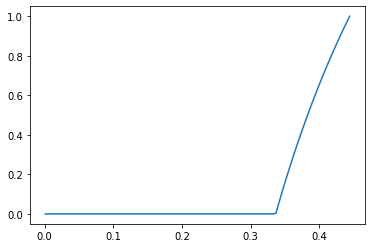

In [8]:
# plot switch from respiration to fermentation
plt.plot(lrange,a)

In [9]:
# determine Gibbs energy dissipation rate
def gibbsDissipation(a,c):
    '''
    Parameters
    ----------
    a : float
        relative rate of fermentation
    c : float
        total catabolic rate

    Returns
    -------
    D : float
        Gibbs energy dissipation rate
    '''

    alpha1 = a*c
    alpha2 = (1-a)*c
    
    D = alpha1 * G1 + alpha2 * G2
    return D


In [10]:
D = gibbsDissipation(a,c)

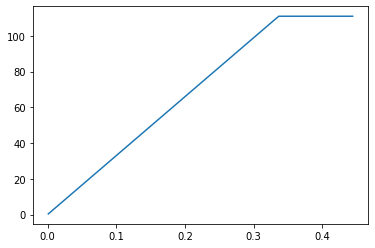

In [11]:
plt.plot()
plt.plot(lrange, D)
plt.show()

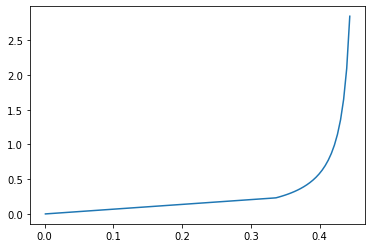

In [12]:
plt.plot()
plt.plot(lrange, c)
plt.show()

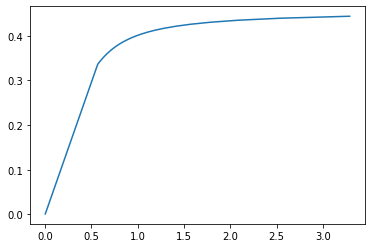

In [13]:
# plot growth rate versus carbon uptake rate (1 C-mol/C-mol/h ~ 6 mmol/gCDW/h)
plt.plot(c+lrange, lrange)

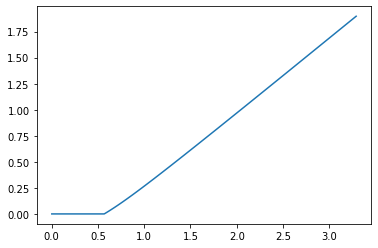

In [14]:
# plot ethanol production in C-mol/C-mol/h
# (1 C-mol/C-mol ethanol ~ 17.5 mmol/gCDW)

alpha1 = a*c
alpha2 = (1-a)*c
plt.plot(c+lrange, alpha1*2/3)

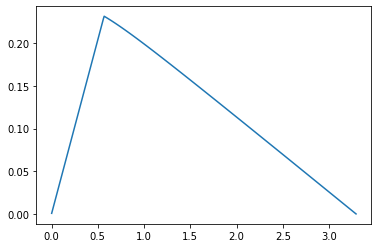

In [15]:
# plot O2 uptake in mol/C-mol/h
# 1 mol/C-mol oxygen ~ 35 mmol/gCDW

plt.plot(c+lrange, alpha2)

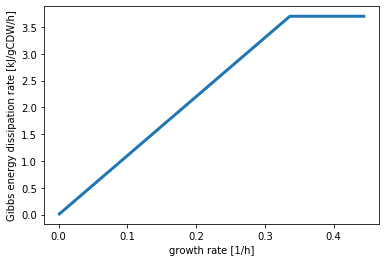

In [16]:
# plot Gibbs energy dissipation rate
gdiss = D/30
plt.plot()
plt.plot(lrange, gdiss, lineWidth=3)
plt.xlabel('growth rate [1/h]')
plt.ylabel('Gibbs energy dissipation rate [kJ/gCDW/h]')
plt.savefig('/tmp/D.png')
plt.show()

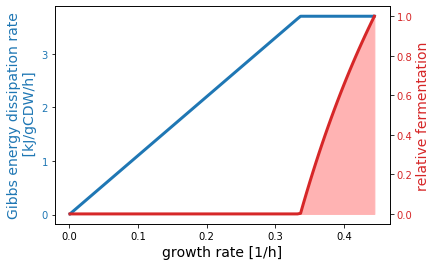

In [40]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('growth rate [1/h]', fontsize=14)
ax1.set_ylabel('Gibbs energy dissipation rate\n [kJ/gCDW/h]', color=color, fontsize=14)
ax1.plot(lrange, gdiss, lineWidth=3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks(np.arange(0,4,1))

ax2=ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('relative fermentation', color=color, fontsize=14)
ax2.plot(lrange, a, lineWidth=3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.fill_between(lrange, 0, a, color=[1,0.7,0.7])
#plt.plot(lrange, gdiss, lineWidth=3)
#plt.xlabel('growth rate [1/h]')
#plt.ylabel('Gibbs energy dissipation rate [kJ/gCDW/h]')
#plt.savefig('/tmp/D.png')
plt.savefig('/tmp/GibbsDissipation_Fermentation.png')
plt.show(fig)

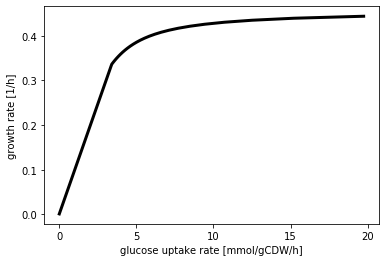

In [18]:
# glucose uptake rate in mmol/gCDW/h
GUR = (c+lrange)*6
plt.plot()
plt.plot(GUR,lrange, color='black', lineWidth=3)
plt.xlabel('glucose uptake rate [mmol/gCDW/h]')
plt.ylabel('growth rate [1/h]')
plt.xticks(np.arange(0,25,5))
plt.savefig('/tmp/GUR_lambda.png')
plt.show()

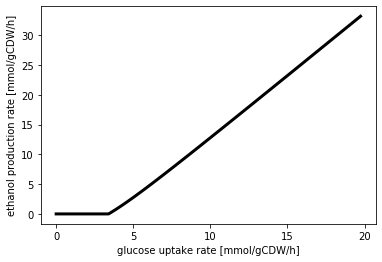

In [19]:
# ethanol production in mmol/gCDW/h
Eth = alpha1 * (2/3) * 17.5
plt.plot()
plt.plot(GUR,Eth, color='black', lineWidth=3)
plt.xlabel('glucose uptake rate [mmol/gCDW/h]')
plt.ylabel('ethanol production rate [mmol/gCDW/h]')
plt.xticks(np.arange(0,25,5))
plt.savefig('/tmp/GUR_Eth.png')
plt.show()

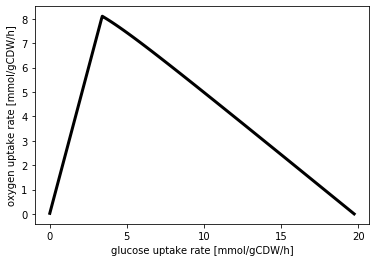

In [20]:
# oxygen uptake in mmol/gCDW/h
Oxy = alpha2 * 35
plt.plot()
plt.plot(GUR,Oxy, color='black', lineWidth=3)
plt.xlabel('glucose uptake rate [mmol/gCDW/h]')
plt.ylabel('oxygen uptake rate [mmol/gCDW/h]')
plt.xticks(np.arange(0,25,5))
plt.savefig('/tmp/GUR_O2.png')
plt.show()

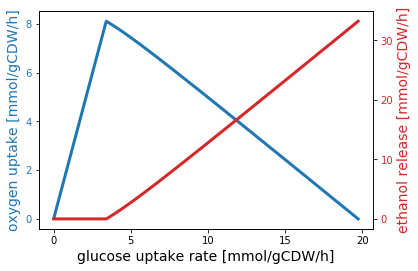

In [43]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('glucose uptake rate [mmol/gCDW/h]', fontsize=14)
ax1.set_ylabel('oxygen uptake [mmol/gCDW/h]', color=color, fontsize=14)
ax1.plot(GUR, Oxy, lineWidth=3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks(np.arange(0,10,2))
ax1.set_xticks(np.arange(0,25,5))

ax2=ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ethanol release [mmol/gCDW/h]', color=color, fontsize=14)
ax2.plot(GUR, Eth, lineWidth=3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks(np.arange(0,40,10))
#ax2.fill_between(lrange, 0, a, color=[1,0.7,0.7])
#plt.plot(lrange, gdiss, lineWidth=3)
#plt.xlabel('growth rate [1/h]')
#plt.ylabel('Gibbs energy dissipation rate [kJ/gCDW/h]')
#plt.savefig('/tmp/D.png')
plt.savefig('/tmp/GUR_O2_Eth.png')
plt.show(fig)

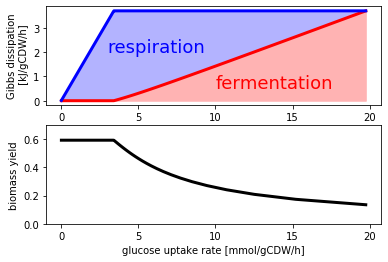

In [22]:
#fig, ax = plt.subplots()

#plt.subplot(2,1,1)
ax1 = plt.subplot(2,1,1)
color='tab:red'
gferm = alpha1 * G1 / 30
plt.plot(GUR, gferm, lineWidth=3, color='red')
plt.plot(GUR, gdiss, lineWidth=3, color='blue')
ax1.fill_between(GUR, 0, gferm, color=[1,.7,.7])
ax1.fill_between(GUR, gferm, gdiss, color=[.7,.7,1])
plt.xlabel('glucose uptake rate [mmol/gCDW/h]')
plt.ylabel('Gibbs dissipation\n [kJ/gCDW/h]')
plt.xticks(np.arange(0,25,5))
plt.yticks(np.arange(0,4,1))
plt.text(3,2,'respiration',color='blue',fontSize=18)
plt.text(10,.5,'fermentation',color='red',fontSize=18)
ax2=plt.subplot(2,1,2)
plt.plot(GUR, lrange/(c+lrange), lineWidth=3, color='black')
plt.xlabel('glucose uptake rate [mmol/gCDW/h]')
plt.xticks(np.arange(0,25,5))
plt.ylabel('biomass yield')
plt.ylim(0,0.7)
#plt.savefig('/tmp/GUR_gferm_gresp.png')
plt.show()

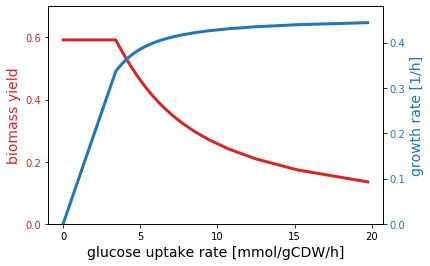

In [37]:
fig, ax2 = plt.subplots()
color = 'tab:red'
ax2.set_xlabel('glucose uptake rate [mmol/gCDW/h]', fontsize=14)
ax2.set_ylabel('biomass yield', color=color, fontsize=14)
ax2.plot(GUR, lrange/(c+lrange), lineWidth=3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,0.7)
ax2.set_yticks(np.arange(0,.8,.2))

ax1=ax2.twinx()

color = 'tab:blue'
ax1.set_ylabel('growth rate [1/h]', color=color, fontsize=14)
ax1.plot(GUR, lrange, lineWidth=3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks(np.arange(0,.5,.1))
ax1.set_xticks(np.arange(0,25,5))
ax1.set_ylim(0,0.48)
plt.savefig('/tmp/GUR_lambda_yield.png')
plt.show(fig)


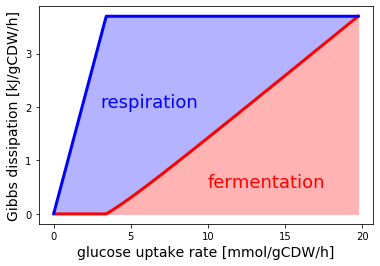

In [28]:
fig, ax1 = plt.subplots()
plt.plot(GUR, gferm, lineWidth=3, color='red')
plt.plot(GUR, gdiss, lineWidth=3, color='blue')
ax1.fill_between(GUR, 0, gferm, color=[1,.7,.7])
ax1.fill_between(GUR, gferm, gdiss, color=[.7,.7,1])
plt.xlabel('glucose uptake rate [mmol/gCDW/h]', fontsize=14)
plt.ylabel('Gibbs dissipation [kJ/gCDW/h]', fontsize=14)
plt.xticks(np.arange(0,25,5))
plt.yticks(np.arange(0,4,1))
plt.text(3,2,'respiration',color='blue',fontSize=18)
plt.text(10,.5,'fermentation',color='red',fontSize=18)
plt.savefig('/tmp/GUR_gferm_gresp.png')
plt.show()